# Laboratory exercise 6

The notebook contains exercises connected to auditory exercise 7. For any questions feel free to contact assistant: eda.jovicic@fer.hr

The main task of this notebook is to make predictions using supported learning with the Scikit Learn library. The goal is to predict the grade in Math considering other features of the student.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
#solution

df = pd.read_csv('students_score_handled.csv', index_col=0)

In [3]:
df.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0


2. Transform the MathScore feature into grades (1-5) using the following scoring system:

|   MathScore |  Grade  |
| ----------- | ------- |
|  88 - 100   |    5    |
|  75 - 87    |    4    |
|  63 - 74    |    3    |
|  50 - 62    |    2    |
|   0 - 49    |    1    |

In [4]:
#solution

def fun_transf(x):
    if x in range(0,50):
        return 1
    elif x in range(50,63):
        return 2
    elif x in range(63,75):
        return 3
    elif x in range(75,88):
        return 4
    else:
        return 5
    
df['MathScore'] = df['MathScore'].map(lambda x:fun_transf(x))

In [5]:
df.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,3,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,3,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,4,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,1,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,4,78,75,0.0,1.0,0.0,1.0


3. Divide the dataset into features (X) and predictions (y). For features we will use all the columns except MathScore, ReadingScore and WritingScore. For predictions we will use the MathScore column. Split the dataset into training and testing sets. The split should be done in a  70-30% ratio.

In [9]:
#X (all features except MathScore, ReadingScore, WritingScore)
#feature_cols = ['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMartialStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'Gender_female', 'Gender_male', 'LunchType_free/reduced', 'LunchType_standard']
feature_cols = df.columns[~df.columns.isin(['MathScore', 'ReadingScore', 'WritingScore'])].values.tolist()
feature_cols
X = df[feature_cols]
y = df['MathScore']

In [10]:
#splitting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

4. Create a Random Forest model, with max_depth=5 and n_estimators=20. Train the model using training set, and then test it on testing set. Display the confusion matrix. Show precision, recall and F1 score for all grades. 

C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.53      0.06      0.10      1174
           2       0.35      0.42      0.38      2200
           3       0.33      0.57      0.42      2547
           4       0.36      0.27      0.31      2027
           5       0.00      0.00      0.00       788

    accuracy                           0.35      8736
   macro avg       0.32      0.27      0.24      8736
weighted avg       0.34      0.35      0.31      8736



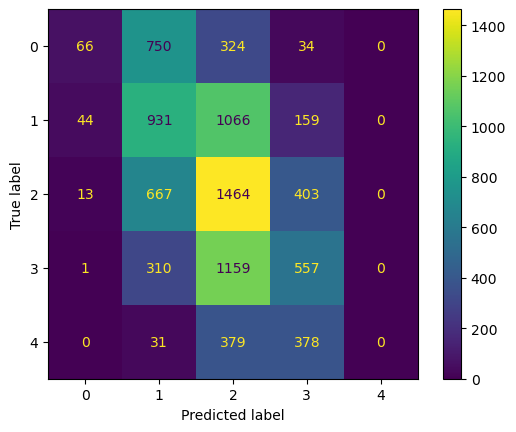

In [35]:
#Random Forest model

#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))


5. The accuracy of our model is not the best. The reason could be having too many possible classes (grades). Let's transform the data again, but this time, instead of predicting grades, we want to predict whether the student will pass (grades 2, 3, 4 and 5) or fail (grade 1) math. After transforming the MathScore accordingly (0 - failed, 1 - passed), repeat task 4 and compare the results.

In [36]:
df['MathScore'].value_counts()

MathScore
3    8503
2    7393
4    6626
1    4016
5    2579
Name: count, dtype: int64

In [37]:
#transform grades into failed (0) or passed (1) 

df.loc[df['MathScore'] == 1, 'MathScore'] = 0
df.loc[df['MathScore'] >= 2, 'MathScore'] = 1



In [38]:
df.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,1,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,1,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,1,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,0,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,1,78,75,0.0,1.0,0.0,1.0


In [39]:
# feature_cols and X stay the same
y = df['MathScore']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1174
           1       0.87      1.00      0.93      7562

    accuracy                           0.87      8736
   macro avg       0.43      0.50      0.46      8736
weighted avg       0.75      0.87      0.80      8736



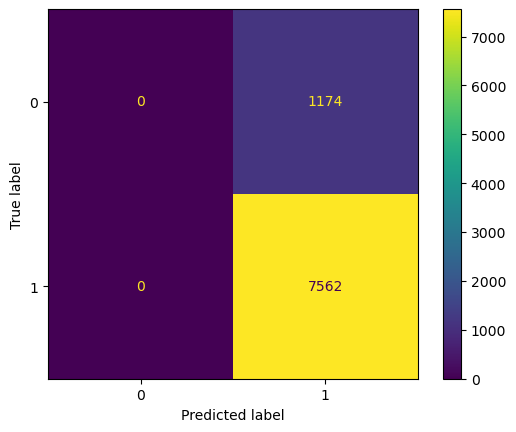

In [41]:
#Random Forest model

clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))


6. Compare the results. Did our model work better in the first case or the second? Explain why and suggest a way to improve it.

The model worked better in the first case. In the confusion matrix, some grades are well guessed, but we also have false predictions In the second case, the model estimated that all test students have passed. It is not weird. As can be seen with ```df['MathScore'].value_counts()```, in the entire dataset grade 2 deserved 7393 students, grade 3 8503, grade 4 6626, and grade 5 2579 students. 4016 students have failed. If we count all the students that have passed, we obtain 25101 student. There are 29117 students in total. 13.79% of students have failed. The dataset is imbalanced for this type of predictions.

To fight imbalanced dataset, we could assign different weights to different classes. The minority class should be assigned a higher weight (and thus higher misclassification cost) to reduce bias towards the majority class. In sklearn, there is ```class weight``` parameter that assigns weights to each class.

Also, oversampling of the minority class or undersampling the majority class could be done.